In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [4]:
pharma_data.shape

(25079, 18)

In [5]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
ID_Patient_Care_Situation    25079 non-null int64
Diagnosed_Condition          25079 non-null int64
Patient_ID                   25079 non-null int64
Treated_with_drugs           25071 non-null object
Patient_Age                  25079 non-null int64
Patient_Body_Mass_Index      25079 non-null float64
Patient_Smoker               25079 non-null object
Patient_Rural_Urban          25079 non-null object
Patient_mental_condition     25079 non-null object
A                            23723 non-null float64
B                            23723 non-null float64
C                            23723 non-null float64
D                            23723 non-null float64
E                            23723 non-null float64
F                            23723 non-null float64
Z                            23723 non-null float64
Number_of_prev_cond          23723 non-null float64
Survived_1_year    

In [6]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,25079.000000
mean,16509.925396,26.382631,6237.758523,33.193548,23.439952,0.894111,0.136028,0.183409,0.083716,0.396240,0.054420,0.000337,1.748261,0.634316
std,9536.958469,15.096967,3603.338849,19.507617,3.778849,0.307702,0.342826,0.387009,0.276968,0.489126,0.226849,0.018361,0.770324,0.481631
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8220.000000,13.000000,3125.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16466.000000,26.000000,6228.000000,33.000000,23.369168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24784.000000,40.000000,9356.500000,50.000000,26.730785,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33013.000000,52.000000,12514.000000,142.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [7]:
pharma_data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,7895,51,848,dx1 dx3 dx4,20,23.438528,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
6,17785,49,6663,DX5,5,23.882432,NO,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
7,343,35,248,dx2,45,17.059734,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,11729,36,8098,dx6,43,22.182933,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
9,15319,15,10018,DX6,60,17.956259,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


In [8]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

In [9]:
print(pharma_data['A'].value_counts())
print(pharma_data['B'].value_counts())
print(pharma_data['C'].value_counts())
print(pharma_data['D'].value_counts())
print(pharma_data['E'].value_counts())
print(pharma_data['F'].value_counts())
print(pharma_data['Z'].value_counts())

1.0    21211
0.0     2512
Name: A, dtype: int64
0.0    20496
1.0     3227
Name: B, dtype: int64
0.0    19372
1.0     4351
Name: C, dtype: int64
0.0    21737
1.0     1986
Name: D, dtype: int64
0.0    14323
1.0     9400
Name: E, dtype: int64
0.0    22432
1.0     1291
Name: F, dtype: int64
0.0    23715
1.0        8
Name: Z, dtype: int64


In [10]:
pharma_data['Number_of_prev_cond'].value_counts()

1.0    10233
2.0     9733
3.0     3292
4.0      426
5.0       39
Name: Number_of_prev_cond, dtype: int64

In [11]:
pharma_data['A'].fillna(1,inplace=True)
pharma_data['B'].fillna(0,inplace=True)
pharma_data['C'].fillna(0,inplace=True)
pharma_data['D'].fillna(0,inplace=True)
pharma_data['E'].fillna(0,inplace=True)
pharma_data['F'].fillna(0,inplace=True)
pharma_data['Z'].fillna(0,inplace=True)

In [12]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                               0
B                               0
C                               0
D                               0
E                               0
F                               0
Z                               0
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

pharma_data['Treated_with_drugs'].unique()

pharma_data['Treated_with_drugs']=pharma_data['Treated_with_drugs'].str.upper()

pharma_data['Treated_with_drugs'].unique()

In [13]:
pharma_data['Treated_with_drugs'].unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


In [14]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
ID_Patient_Care_Situation    25079 non-null int64
Diagnosed_Condition          25079 non-null int64
Patient_ID                   25079 non-null int64
Treated_with_drugs           25071 non-null object
Patient_Age                  25079 non-null int64
Patient_Body_Mass_Index      25079 non-null float64
Patient_Smoker               25079 non-null object
Patient_Rural_Urban          25079 non-null object
Patient_mental_condition     25079 non-null object
A                            25079 non-null float64
B                            25079 non-null float64
C                            25079 non-null float64
D                            25079 non-null float64
E                            25079 non-null float64
F                            25079 non-null float64
Z                            25079 non-null float64
Number_of_prev_cond          23723 non-null float64
Survived_1_year    

In [15]:
pharma_data['Patient_Smoker'].unique()

array(['NO', 'NO ', 'YES', 'YES ', 'YESS ', 'YESS', 'Cannot say ',
       'Cannot say', 'CANNOT SAY ', 'CANNOT SAY'], dtype=object)

In [16]:
pharma_data['Patient_Smoker']=pharma_data['Patient_Smoker'].replace({'YES':1,'YESS':1,'YESS ':1, 'YES ':1,'NO':0,'NO ':0,'Cannot say ':0,
       'Cannot say':0, 'CANNOT SAY ':0, 'CANNOT SAY':0})

In [17]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,0,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,0,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,0,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,0,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,0,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [18]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                               0
B                               0
C                               0
D                               0
E                               0
F                               0
Z                               0
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

In [19]:
pharma_data['Treated_with_drugs'].fillna('DX6',inplace=True)

In [20]:
pharma_data['Number_of_prev_cond'].value_counts()

1.0    10233
2.0     9733
3.0     3292
4.0      426
5.0       39
Name: Number_of_prev_cond, dtype: int64

In [21]:
pharma_data['Number_of_prev_cond'].fillna(1.0,inplace=True)

In [22]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [23]:
pharma_data['Survived_1_year'].value_counts()

1    15908
0     9171
Name: Survived_1_year, dtype: int64

In [24]:
9171/len(pharma_data)

0.3656844371785159

In [25]:
15908/len(pharma_data)

0.6343155628214842

In [26]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
ID_Patient_Care_Situation    25079 non-null int64
Diagnosed_Condition          25079 non-null int64
Patient_ID                   25079 non-null int64
Treated_with_drugs           25079 non-null object
Patient_Age                  25079 non-null int64
Patient_Body_Mass_Index      25079 non-null float64
Patient_Smoker               25079 non-null int64
Patient_Rural_Urban          25079 non-null object
Patient_mental_condition     25079 non-null object
A                            25079 non-null float64
B                            25079 non-null float64
C                            25079 non-null float64
D                            25079 non-null float64
E                            25079 non-null float64
F                            25079 non-null float64
Z                            25079 non-null float64
Number_of_prev_cond          25079 non-null float64
Survived_1_year     

In [27]:
pharma_data['Patient_Rural_Urban'].value_counts()

RURAL    17482
URBAN     7597
Name: Patient_Rural_Urban, dtype: int64

In [28]:
pharma_data['Patient_Rural_Urban']=pharma_data['Patient_Rural_Urban'].replace({'RURAL':0,'URBAN':1})

In [29]:
pharma_data['Patient_mental_condition'].value_counts()

Stable    25079
Name: Patient_mental_condition, dtype: int64

In [30]:
pharma_data=pharma_data.drop('Patient_mental_condition',axis=1)

In [31]:
#pharma_data['Patient_mental_condition']=pharma_data['Patient_mental_condition'].str.strip("\"")


In [32]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


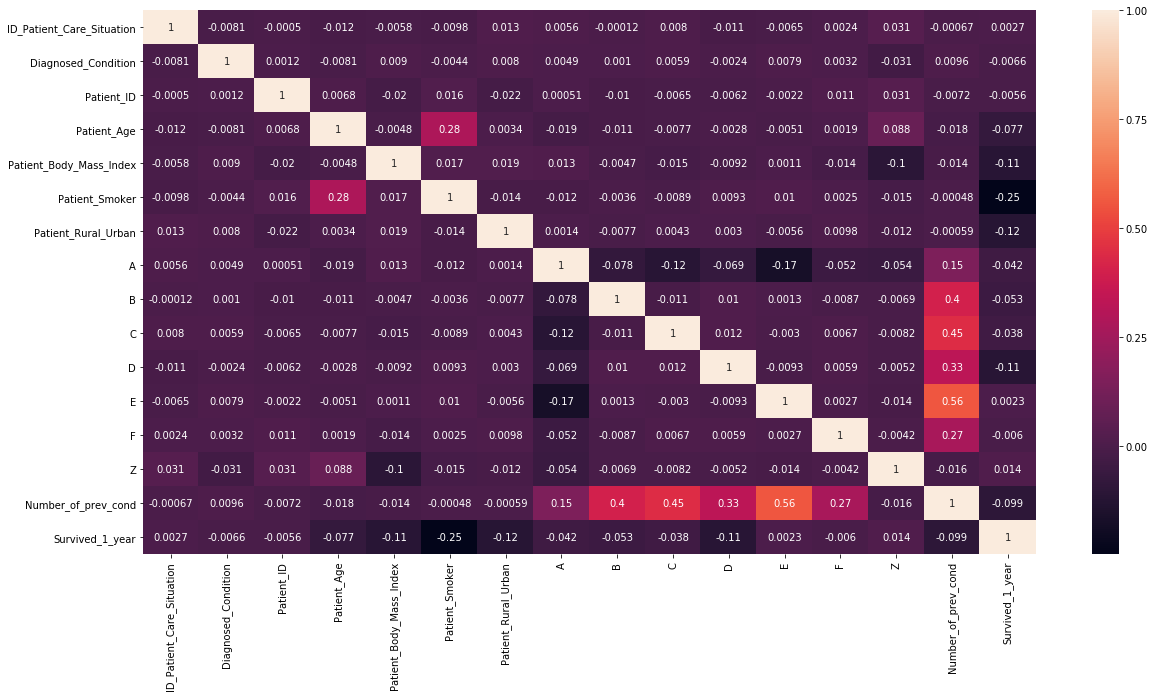

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(pharma_data.corr(), annot = True)
plt.show()

In [34]:
#pharma_data=pharma_data.drop('Number_of_prev_cond',axis=1)

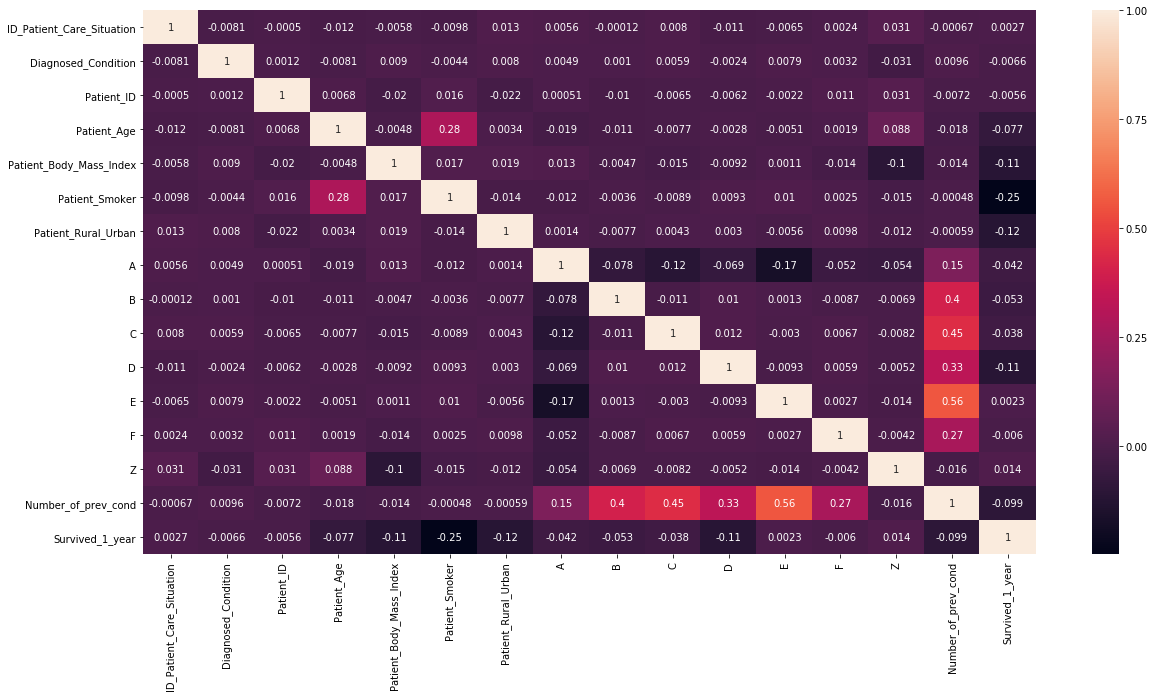

In [35]:
plt.figure(figsize = (20, 10))
sns.heatmap(pharma_data.corr(), annot = True)
plt.show()

In [36]:
pharma_data_with_smoker=pharma_data
pharma_data_without_smoker=pharma_data.drop('Patient_Smoker',axis=1)

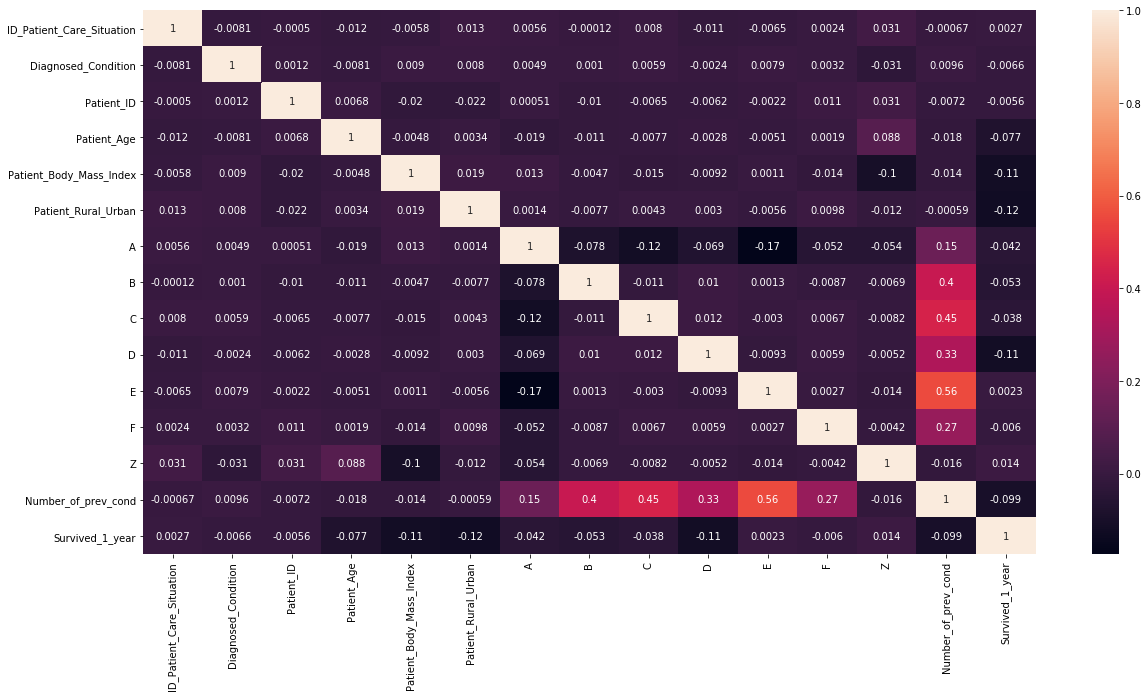

In [37]:
plt.figure(figsize = (20, 10))
sns.heatmap(pharma_data_without_smoker.corr(), annot = True)
plt.show()

In [38]:
x=pharma_data_with_smoker.drop('Survived_1_year',axis=1)
y=pharma_data_with_smoker['Survived_1_year']

x=pharma_data_without_smoker.drop('Survived_1_year',axis=1)
y=pharma_data_without_smoker['Survived_1_year']

In [39]:
x=x.drop('Treated_with_drugs',axis=1)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [41]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred_train=logreg.predict(x_train)

D:\python anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
print(f"Test Accuracy: {sklearn.metrics.accuracy_score(y_test,y_pred)}")
print(f"Train Accuracy: {sklearn.metrics.accuracy_score(y_train,y_pred_train)}")

Test Accuracy: 0.6574960127591707
Train Accuracy: 0.6726810546777651


In [43]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9132087424770352

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7704436130411545

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(random_state=42,n_estimators=295)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=295, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [63]:
x.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,16201,47,8433,60,21.655523,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,9421,3,2972,2,28.852743,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
2,16205,7,8608,20,26.179725,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,5582,31,10074,8,22.638945,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,20880,43,7462,53,21.326131,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
y_pred=clf.predict(x_test)
y_pred_train=logreg.predict(x_train)

In [48]:
print(f"Test Accuracy: {sklearn.metrics.accuracy_score(y_test,y_pred)}")
print(f"Train Accuracy: {sklearn.metrics.accuracy_score(y_train,y_pred_train)}")

Test Accuracy: 0.7858851674641149
Train Accuracy: 0.6726810546777651


In [49]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8824833702882483

In [50]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8383990370147457

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [52]:
reg_knn = KNeighborsClassifier()
reg_knn.fit(x_train, y_train)
y_pred = reg_knn.predict(x_test)

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.30      0.35      1859
           1       0.64      0.74      0.69      3157

   micro avg       0.58      0.58      0.58      5016
   macro avg       0.53      0.52      0.52      5016
weighted avg       0.56      0.58      0.56      5016



In [54]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7431105479885968

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6902030008826125

In [56]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv',low_memory=False)

In [57]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
test_new=test_new.drop(['Patient_mental_condition'],axis=1)

In [59]:
test_new['Patient_Rural_Urban']=test_new['Patient_Rural_Urban'].replace({'RURAL':0,'URBAN':1})

In [60]:
test_new['Patient_Smoker'].unique()

array(['NO', 'NO ', 'YES ', 'YES', 'YESS', 'YESS '], dtype=object)

In [61]:
test_new['Patient_Smoker']=test_new['Patient_Smoker'].replace({'NO':0, 'NO ':0, 'YES ':1, 'YES':1, 'YESS':1, 'YESS ':1})

test_new['Treated_with_drugs']=test_new['Treated_with_drugs'].replace({'DX5 ':'DX5 '})

test_new['Treated_with_drugs']=pd.to_numeric(test_new['Treated_with_drugs'], downcast='float')
#test_new['Treated_with_drugs']=pd.to_numeric(test_new['Treated_with_drugs'],errors='coerce')

In [ ]:
drugs=[]
for i in range(len(test_new)):
    drugs.append(test_new['Treated_with_drugs'][i].strip())


In [ ]:
test_new['Treated_with_drugs']=drugs

In [ ]:
pred = clf.predict(test_new)

In [ ]:
res = pd.DataFrame(pred)
res.index = test_new.index # its important for comparison
res.columns = ["pred"]
res.to_csv("survival6.csv")  